# **Tugas 2 data_understanding**
## **Penjelasan Outlier Deteksi**
### **Mendeteksi Outlier Menggunakan K-Nearest Neighbors (KNN) dalam Analisis Data**  
#### 1. Pengenalan Outlier dalam Analisis Data
Outlier adalah data yang memiliki nilai yang sangat berbeda dibandingkan dengan sebagian besar data lainnya dalam suatu dataset. Outlier dapat muncul karena berbagai faktor, seperti kesalahan pengukuran, kesalahan saat memasukkan data, atau fenomena yang jarang terjadi. Dalam tahap pemahaman data, penting untuk mengidentifikasi outlier karena keberadaannya dapat berdampak pada hasil analisis, pemodelan, serta pengambilan keputusan. Jika tidak terdeteksi, outlier dapat menyebabkan model analisis statistik atau machine learning menjadi kurang akurat, bias, atau bahkan gagal menghasilkan prediksi yang valid.

#### 2. Pendekatan K-Nearest Neighbors (KNN) dalam Mendeteksi Outlier
Salah satu metode yang dapat digunakan untuk mendeteksi outlier adalah K-Nearest Neighbors (KNN). Algoritma ini bekerja berdasarkan prinsip bahwa sebagian besar data normal akan berada dalam kelompok yang padat, sementara outlier cenderung berada jauh dari kelompok utama. Berikut adalah cara kerja dasar KNN dalam mendeteksi outlier:


*   Mekanisme Kerja KNN:



KNN menghitung jarak antara satu titik data dengan titik-titik data di sekitarnya. Jika suatu titik memiliki jarak yang cukup jauh dari sebagian besar tetangganya, maka titik tersebut bisa dianggap sebagai outlier. Secara matematis, KNN mengukur jarak menggunakan berbagai metode seperti Euclidean, Manhattan, atau Minkowski untuk menentukan k-tetangga terdekat. Jika rata-rata jarak ke k-tetangga lebih besar dari nilai ambang tertentu, maka titik tersebut dikategorikan sebagai outlier.

#### Kapan Menggunakan KNN untuk Deteksi Outlier?
KNN merupakan metode yang berguna dalam mendeteksi outlier dalam beberapa kondisi berikut

Data dengan Dimensi Tinggi: KNN mampu bekerja pada dataset dengan banyak fitur, meskipun kinerjanya dapat menurun jika jumlah dimensi terlalu besar akibat efek "curse of dimensionality".

Data Tanpa Distribusi Tertentu: Algoritma ini tidak memerlukan asumsi tentang distribusi data, sehingga cocok digunakan pada dataset yang tidak mengikuti distribusi normal atau tertentu.

Dataset Berukuran Sedang: KNN lebih optimal digunakan pada dataset yang tidak terlalu besar karena kompleksitas komputasi meningkat seiring bertambahnya jumlah data. Jika dataset terlalu besar, metode lain seperti Local Outlier Factor (LOF) atau Isolation Forest bisa menjadi pilihan yang lebih efisien.


#### Kesimpulan
K-Nearest Neighbors (KNN) adalah metode yang cukup efektif dalam mengidentifikasi outlier, terutama pada tahap eksplorasi data. Metode ini memanfaatkan perhitungan jarak untuk menemukan titik data yang memiliki perbedaan signifikan dibandingkan sebagian besar data lainnya. Meskipun memiliki kelebihan seperti fleksibilitas dan kemudahan implementasi, KNN juga memiliki beberapa kekurangan, terutama dalam hal efisiensi komputasi serta pemilihan parameter yang tepat. Oleh karena itu, penting untuk memahami karakteristik dataset sebelum memilih KNN sebagai metode deteksi outlier.

Dalam praktiknya, KNN sering dikombinasikan dengan teknik lain, seperti visualisasi data (misalnya scatter plot atau box plot), untuk memverifikasi hasil deteksi outlier dan memastikan kualitas data yang lebih baik sebelum melanjutkan ke tahap pemodelan.

In [3]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.1 MB/s eta 0:00:00


 id           class  petal_length  petal_width  sepal_length  sepal_width  distance  outlier
  1     Iris-setosa           1.4          0.2           5.1          3.5  5.424942    False
  2     Iris-setosa          14.0          2.0          40.9         30.0 46.407542     True
  3     Iris-setosa           1.3          0.2           4.7          3.2  5.430470    False
  4     Iris-setosa           1.5          0.2           4.6          3.1  5.273519    False
  5     Iris-setosa           1.4          0.2           5.0          3.6  5.485435     True
  6     Iris-setosa           1.7          0.4           5.4          3.9  5.288667    False
  7     Iris-setosa           1.4          0.3           4.6          3.4  5.412947    False
  8     Iris-setosa           1.5          0.2           5.0          3.4  5.325411    False
  9     Iris-setosa           1.4          0.2           4.4          2.9  5.316014    False
 10     Iris-setosa           1.5          0.1           4.9          

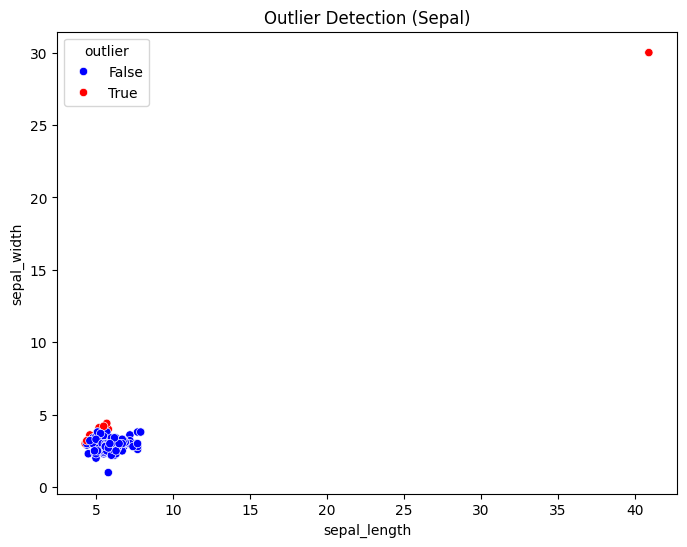

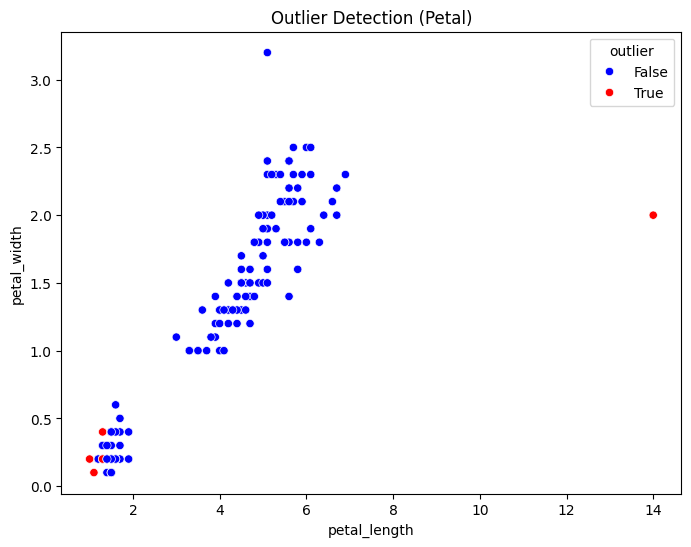

In [4]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-349c0f6d-posgresqlsilvia.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_EribuBMoRkDuBfKtYVP",
        database="defaultdb",
        port=16412
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-397b65f2-posgresqlsilvia.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_TZ0J8yRi7GrNiHAIr19",
        database="defaultdb",
        port=16412
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# Ambil referensi dari baris terakhir (baris ke-152 jika dihitung dari 1, atau index -1)
reference_point = data_values[-1]

def compute_distances(data, reference):
    return np.array([euclidean(row, reference) for row in data])

# Hitung jarak Euclidean dari setiap baris ke referensi
df_merged["distance"] = compute_distances(data_values, reference_point)

# Tentukan threshold outlier berdasarkan persentil ke-95 (bisa disesuaikan)
threshold = np.percentile(df_merged["distance"], 93.5)
df_merged["outlier"] = df_merged["distance"] > threshold

# Cetak hasil data dengan outlier
print(df_merged.to_string(index=False))

# Visualisasi scatter plot dengan warna berdasarkan outlier
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal_length"], y=df_merged["sepal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Sepal)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal_length"], y=df_merged["petal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Petal)")
plt.show()


In [ ]:
# Hitung total outlier
total_outliers = df_merged["outlier"].sum()
print(f"Total Outlier: {total_outliers}")


Total Outlier: 10


In [5]:
# Urutkan data berdasarkan jarak dari terkecil ke terbesar
df_sorted = df_merged.sort_values(by="distance", ascending=True)

# Tampilkan hasilnya
print(df_sorted.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  distance  outlier
151             ???           5.1          3.2           5.8          1.0  0.000000    False
114  Iris-virginica           5.0          2.0           5.7          2.5  1.926136    False
115  Iris-virginica           5.1          2.4           5.8          2.8  1.969772    False
147  Iris-virginica           5.0          1.9           6.3          2.5  2.049390    False
120  Iris-virginica           5.0          1.5           6.0          2.2  2.092845    False
102  Iris-virginica           5.1          1.9           5.8          2.7  2.140093    False
143  Iris-virginica           5.1          1.9           5.8          2.7  2.140093    False
122  Iris-virginica           4.9          2.0           5.6          2.8  2.181742    False
 69 Iris-versicolor           4.5          1.5           6.2          2.2  2.202272    False
133  Iris-virginica           5.6          2.2           6.4          